In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
lrpd = pd.read_csv("../data/lrpd-clean.csv")
lrpd = lrpd.set_index("INCIDENT_NUMBER")

In [53]:
lrpd.head()

,INCIDENT_DATE,LOCATION_DISTRICT,OFFENSE_DESCRIPTION,WEAPON_TYPE,INCIDENT_LOCATION,ZIP,LATITUDE,LONGITUDE,INCIDENT_TIME
INCIDENT_NUMBER,,,,,,,,,
2021-092971,08/04/2021,72.0,THEFT FROM MOTOR VEHICLE,0,15601 KANIS RD,72204.0,0.000000,0.000000,10:21 AM
2017-029450,03/16/2017,82.0,THEFT OF MOTOR VEHICLE PARTS,0,10801 IRONTON CUTOFF RD,72206.0,34.649362,-92.301959,06:30 PM
2017-156453,09/01/2017,53.0,RAPE,0,0,0.0,0.000000,0.000000,12:00 PM
2019-130717,10/17/2019,51.0,RAPE,0,0,0.0,0.000000,0.000000,09:00 PM
2020-073313,07/02/2020,50.0,RAPE,0,0,0.0,0.000000,0.000000,07:10 PM


In [54]:
lrpd.shape

(81833, 9)

In [55]:
def describe_unique(column):
    print(f'DESCRIBING {column}')
    print(column.unique())
    print(column.describe())

In [56]:
describe_unique(lrpd["INCIDENT_LOCATION"])

DESCRIBING INCIDENT_NUMBER
2021-092971             15601  KANIS RD
2017-029450     10801 IRONTON CUTOFF RD
2017-156453                           0
2019-130717                           0
2020-073313                           0
                         ...           
2018-066314       1601 N SHACKLEFORD RD
2020-040599            225 KEIGHTLEY DR
2020-091056         501  NAPA VALLEY DR
2021-068606    13121 SAINT CHARLES BLVD
2017-123107       1619 REBSAMEN PARK RD
Name: INCIDENT_LOCATION, Length: 81833, dtype: object
['15601  KANIS RD' '10801 IRONTON CUTOFF RD' '0' ...
 '3 RESERVOIR HEIGHTS DR' '5 LEDGELAWN DR' '1807  FOREMAN DR']
count     81833
unique    27905
top           0
freq       1053
Name: INCIDENT_LOCATION, dtype: object


In [57]:
has_location = lrpd.loc[lrpd["INCIDENT_LOCATION"] != "0"]
describe_unique(has_location["INCIDENT_LOCATION"])

DESCRIBING INCIDENT_NUMBER
2021-092971              15601  KANIS RD
2017-029450      10801 IRONTON CUTOFF RD
2022-301030    10901 BEVERLY HILLS DRIVE
2022-302467             1321 MAIN STREET
2021-027276                5010  OPAL ST
                         ...            
2018-066314        1601 N SHACKLEFORD RD
2020-040599             225 KEIGHTLEY DR
2020-091056          501  NAPA VALLEY DR
2021-068606     13121 SAINT CHARLES BLVD
2017-123107        1619 REBSAMEN PARK RD
Name: INCIDENT_LOCATION, Length: 80780, dtype: object
['15601  KANIS RD' '10801 IRONTON CUTOFF RD' '10901 BEVERLY HILLS DRIVE'
 ... '3 RESERVOIR HEIGHTS DR' '5 LEDGELAWN DR' '1807  FOREMAN DR']
count                     80780
unique                    27904
top       2700 S SHACKLEFORD RD
freq                       1025
Name: INCIDENT_LOCATION, dtype: object


In [58]:
shackleford_rd = lrpd.loc[lrpd["INCIDENT_LOCATION"] == "2700 S SHACKLEFORD RD"]
shackleford_rd

,INCIDENT_DATE,LOCATION_DISTRICT,OFFENSE_DESCRIPTION,WEAPON_TYPE,INCIDENT_LOCATION,ZIP,LATITUDE,LONGITUDE,INCIDENT_TIME
INCIDENT_NUMBER,,,,,,,,,
2020-147661,12/21/2020,63.0,ALL OTHER LARCENY,0,2700 S SHACKLEFORD RD,72211.0,34.472833,-92.239772,02:00 PM
2021-141903,11/18/2021,63.0,THEFT FROM BUILDING,0,2700 S SHACKLEFORD RD,72205.0,34.472833,-92.239772,07:22 PM
2021-052795,05/14/2021,63.0,AGGRAVATED ASSAULT,MOTOR VEHICLE,2700 S SHACKLEFORD RD,72209.0,34.688830,-92.332645,11:06 AM
2021-082783,07/13/2021,63.0,SHOPLIFTING,0,2700 S SHACKLEFORD RD,72205.0,34.472833,-92.239772,10:25 PM
2021-060242,05/29/2021,63.0,ALL OTHER LARCENY,0,2700 S SHACKLEFORD RD,72205.0,34.472833,-92.239772,12:01 PM
...,...,...,...,...,...,...,...,...,...
2021-009322,02/01/2021,63.0,ALL OTHER LARCENY,0,2700 S SHACKLEFORD RD,72209.0,0.000000,0.000000,09:12 PM
2021-157400,12/26/2021,63.0,ALL OTHER LARCENY,"PERSONAL WEAPONS (HANDS, FISTS, ETC)",2700 S SHACKLEFORD RD,72204.0,0.000000,0.000000,10:07 AM
2021-009342,02/01/2021,63.0,SHOPLIFTING,0,2700 S SHACKLEFORD RD,72209.0,0.000000,0.000000,10:11 PM


In [59]:
shackleford_rd["OFFENSE_DESCRIPTION"].describe()

count            1025
unique             10
top       SHOPLIFTING
freq              711
Name: OFFENSE_DESCRIPTION, dtype: object

In [80]:
unique_offenses = shackleford_rd["OFFENSE_DESCRIPTION"].unique()
value_counts = shackleford_rd["OFFENSE_DESCRIPTION"].value_counts()

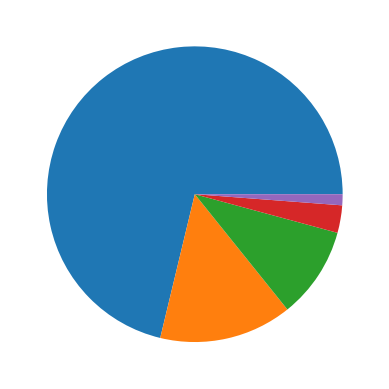

In [82]:
plt.pie(value_counts[:5])
# ax.pie(shackleford_rd["OFFENSE_DESCRIPTION"].value_counts(), labels=unique_offenses, autopct='%1.2f%%')
plt.show()